# ECE-6524 / CS-6524 Deep Learning
# Assignment 4 [100 pts]

In this assignment, we will explore Recurrent Neural Networks (RNN) to deal with the data with temporal sequence. Specifically, we will generate captions for images. We will design an encoder-decoder architecture to achieve this. This homework is inspired by Stanford CS231n and UCSD CSE253.

## Submission guideline for the coding part (Jupyter Notebook)

1. Click the Save button at the top of the Jupyter Notebook
2. Please make sure to have entered your Virginia Tech PID below
3. Once you've completed everything (make sure output for all cells are visible), select File -> Download as -> PDF via LaTeX
4. Look at the PDF file and make sure all your solutions are displayed correctly there 
7. Zip all the files along with this notebook (Please don't include the data). Name it as Assignment_3_Code_[YOUR PID NUMBER].zip
8. Name your PDF file as Assignment_4_NB_[YOUR PID NUMBER].pdf
9. **<span style="color:blue"> Submit your zipped file and the PDF SEPARATELY**</span>

Note: if facing issues with step 3 refer: https://pypi.org/project/notebook-as-pdf/

## Submission guideline for the coding part (Google Colab)

1. Click the Save button at the top of the Notebook
2. Please make sure to have entered your Virginia Tech PID below
3. Follow last two cells in this notebook for guidelines to download pdf file of this notebook
4. Look at the PDF file and make sure all your solutions are displayed correctly there 
5. Zip all the files along with this notebook (Please don't include the data). Name it as Assignment_2_Code_[YOUR PID NUMBER].zip
6. Name your PDF file as Assignment_4_NB_[YOUR PID NUMBER].pdf
7. **<span style="color:blue"> Submit your zipped file and the PDF SEPARATELY**</span>

**While you are encouraged to discuss with your peers, <span style="color:blue">all work submitted is expected to be your own.</span> <span style="color:red">If you use any information from other resources (e.g. online materials), you are required to cite it below you VT PID. Any violation will result in a 0 mark for the assignment.</span>**

### Please Write Your VT PID Here: juvekaradheesh
### Reference (if any):

In this homework, you would need to use **Python 3.6+** along with the following packages (**need to update**):
```
1. pytorch 1.2
2. torchvision
3. numpy
4. matplotlib
5. nltk
```
To install pytorch, please follow the instructions on the [Official website](https://pytorch.org/). In addition, the [official document](https://pytorch.org/docs/stable/) could be very helpful when you want to find certain functionalities. 


In [1]:
# import necessary packages and modules
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision import transforms
from torch.nn.utils.rnn import pack_padded_sequence
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
import os

# Image Captioning Using Encoder-Decoder Architecture

Simply, the encoder will take the image as input and encode it into a vector of feature values. The decoder will take this output from encoder as hidden state and starts to predict next words at each step. The following figure illustrates this:

<img src="figs/image_captioning_overview.jpg" width="600">
Figure 1. An overview of the encoder-decoder architecture
(image credit: <a href="https://link.springer.com/chapter/10.1007/978-3-030-04780-1_23">Deep Neural Network Based Image Captioning</a>)

You will use a pre-trained CNN as the encoder and Vanilla RNN/LSTM as decoder to predict the captions.

# Section 1.1 Data
Download dataset following the instructions. We are gonna use Flickr30k dataset, which consists of 31783 images and 158,915 captions. However, instead of using the whole dataset and "results.csv", we will follow Karpathy's Flickr30k annotations and use "dataset_flickr30k.json". Please move "dataset_flickr30k.json" to "flickr30k_images" folder.

## How to download the data (ARC)
Since the original Flickr30K dataset requires application, we will use the dataset from Kaggle. 

Step 1: Register a Kaggle account. https://www.kaggle.com/

Step 2: Log into ARC server in the terminal, e.g. Huckleberry.

Step 3: Install required packages.

    - if you're gonna use powerai on Huckleberry
        # step 1: request for GPU nodes
        salloc --partition=normal_q --nodes=1 --tasks-per-node=10 --gres=gpu:1 bash
        # or if you don't want a GPU, it will be faster to get a job
        salloc --partition=normal_q --nodes=1 --tasks-per-node=10 bash
        # step 2: load all necessary modules
        module load gcc cuda Anaconda3 jdk
        # step 3: activate the virtual environment
        source activate powerai16_ibm
        # step 4: for new packages(take tqdm for example)
        pip install --user kaggle nltk # on hulogin1/hulogin2
        
    - if you're gonna use your own conda environment, simply type
        pip install kaggle nltk
Step 4: Make sure you have kaggle. Type `kaggle`.

Step 5: Download your kaggle.json file from  https://www.kaggle.com/Your_Username/account. In API section, click Create New API Token. Then move you kaggle.json file to the path `/home/your_name_space/.kaggle/kaggle.json`.

Step 6: Download the dataset. Type `kaggle datasets download hsankesara/flickr-image-dataset`.

Step 7: Unzip the dataset. Type `unzip flickr-image-dataset.zip -x "flickr30k_images/flickr30k_images/flickr30k_images/*.jpg" -d "/path-to-Assignment_4/Assignment_4/"`

Step 8: You should have your dataset in `/path-to-Assignment_4/Assignment_4/flickr30k_images/`

Step 9: Move "dataset_flickr30k.json" to "flickr30k_images" folder.

**Note** that you might want to use `nltk.download('punkt')` and `torchvision.models.resnet50(pretrained=True)` before you enter the GPU node.

## How to download the data (Google Colab)
Step 1: Register a Kaggle account.  https://www.kaggle.com/

Step 2: Download your kaggle.json file from  https://www.kaggle.com/Your_Username/account. In API section, click Create New API Token.

Step 3: As we did before, upload all files on Google Drive and open Google Colab.

Step 4: Install required packages.
    
    ! pip install -q kaggle nltk

Step 5: Insert a cell.
    
    
    from google.colab import files
    files.upload()
    
    
    Upload `kaggle.json` you just downloaded.
    
Step 6: Move `kaggle.json` to the right place,
    
    
     ! mkdir ~/.kaggle
     ! cp kaggle.json ~/.kaggle/
    

Step 7: Change the permission.
    
    ! chmod 600 ~/.kaggle/kaggle.json

Step 8: Download.
    
    !kaggle datasets download hsankesara/flickr-image-dataset

Step 9: Move it to your drive and unzip it.
    
    unzip flickr-image-dataset.zip -x "flickr30k_images/flickr30k_images/flickr30k_images/*.jpg" -d "/path-to-Assignment_4/Assignment_4/"
    
Step 10: Move "dataset_flickr30k.json" to "flickr30k_images" folder.

### Colab Setup: 
- Below are some basic steps for colab setup. 
- Make changes based on requirements.
- Comment out in case of ARC or your local device with powerful GPU.

**Note: For Google Colab give proper paths in this notebook and in dataloader.py if required.**

from google.colab import drive
drive.mount('/content/drive')

In [2]:
import sys
# modify "customized_path_to_homework", path of folder in drive, where you uploaded your homework
path_to_homework = "/home/juvekaradheesh/repositories/DL-Course-Assignments/Assignment_4/Assignment_4"
sys.path.append(path_to_homework)

In [3]:
from dataloader import Flickr30k, get_loader

# Section 1.2 Take a look at the data

In [4]:
# visualize images and captions
flickr = Flickr30k(split='val', root=path_to_homework+'/flickr30k_images/')  # load validation set as an example
flickr()

-------flickr30k--------
image root: /home/juvekaradheesh/repositories/DL-Course-Assignments/Assignment_4/Assignment_4/flickr30k_images/flickr30k_images
dataset split: val
the length of the dataset: 1014


['There are five men in a work office looking at each others computers.', 'Some men are looking at a computer screen in an office.', 'A group of people in an office contemplating.', 'A group of men are engaged in dialogue at work', 'Four men concentrating in an office setting.']


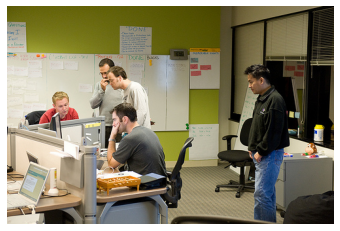

In [5]:
# show a random image and its captions
img_id = np.random.randint(len(flickr))
img = flickr.get_img(img_id)
captions = flickr.get_captions(img_id)

plt.figure()
plt.imshow(img)
plt.axis('off')

print(captions)

In [6]:
del flickr

# Section 1.3 Build vocabulary
We need to build a vocabulary for our dataset. The vocabulary stores all the words and their indices. We will use it to embed and recover the words.

In [7]:
import nltk
import pickle
import json
from tqdm import tqdm
from collections import Counter
nltk.download('punkt') # You can comment this line once you've downloaded 'punkt'

class Vocabulary(object):
    """Simple vocabulary wrapper."""
    def __init__(self):
        self.word2idx = {'<pad>': 0, '<unk>': 1, '<start>': 2, '<end>': 3}  # follow Pytorch padding rules: pad sentence with zero.
        self.idx = 4
        self.idx2word = {v: k for k, v in self.word2idx.items()}

    def __call__(self, key):
        if key not in self.word2idx:
            return self.word2idx['<unk>']
        return self.word2idx[key]

    def __len__(self):
        return len(self.word2idx)

    def add_word(self, word):
        """
        Add new words
        :param word: word
        """
        if word not in self.word2idx:
            self.word2idx[word] = self.idx  # add a new word
            self.idx2word[self.idx] = word
            self.idx += 1

    def reverse(self, value):
        """
        From idx to words.
        :param value: index
        :return:
        """
        if value not in self.idx2word:
            return self.idx2word[1]  # return '<unk>' if the word is unseen before.
        return self.idx2word[value]

def build_vocab(json_file=path_to_homework+ '/flickr30k_images/dataset_flickr30k.json', threshold=3):
    with open(json_file) as f:
            data = json.load(f)
    f.close()
    counter = Counter()
    for img_idx in tqdm(range(len(data['images']))):
        img_annos = data['images'][img_idx]
        for sent_idx in range(len(img_annos['sentids'])):
#             tokens = img_annos['sentences'][sent_idx]['tokens']  # directly load tokens

            caption = img_annos['sentences'][sent_idx]['raw']
            tokens = nltk.tokenize.word_tokenize(caption.lower())
            
            counter.update(tokens)

    # If the number of words is less than threshold we don't count it.
    words = [word for word, cnt in counter.items() if cnt >= threshold]


    # create a Vocabulary class
    vocab = Vocabulary()

    # add words to Vocab
    for i, word in enumerate(words):
        vocab.add_word(word)

    return vocab

[nltk_data] Downloading package punkt to
[nltk_data]     /home/juvekaradheesh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [8]:
# let's create a vocabulary for future usage
vocab_path = path_to_homework + '/flickr30k_images/vocab.pkl'
if not os.path.isfile(vocab_path):  # if we don't have vocab, create one
    vocab = build_vocab(json_file=path_to_homework + '/flickr30k_images/dataset_flickr30k.json', threshold=3)
    with open(vocab_path, 'wb') as f:
        pickle.dump(vocab, f)
    print("Total vocabulary size: {}".format(len(vocab)))
    print("Saved the vocabulary wrapper to '{}'".format(vocab_path))
else:  # if we have, load the existing vocab
    with open(vocab_path, 'rb') as f:
        vocab = pickle.load(f)
    print('vocab loaded!')
    print('the size of vocab:', len(vocab))
f.close()

vocab loaded!
the size of vocab: 9990


In [9]:
vocab_path = path_to_homework + '/flickr30k_images/vocab.pkl'
with open(vocab_path, 'rb') as f:
    vocab = pickle.load(f)
print('vocab loaded!')
print('the size of vocab:', len(vocab))
# print(vocab.word2idx.keys())
# print(vocab.idx2word)

# check some random words
for i in range(3):
    random_idx = np.random.randint(len(vocab))
    print('word: {}, index: {}'.format(list(vocab.word2idx.keys())[random_idx], vocab(list(vocab.word2idx.keys())[random_idx])))

vocab loaded!
the size of vocab: 9990
word: florist, index: 5518
word: cyclist, index: 2065
word: eating, index: 600


# Section 2 Vanilla RNN [45 pts]
# Section 2.1 Design the Network: Encoder [5 pts]
Implement the baseline model by using pre-trained ResNet-50 as the encoder and Vanilla RNN as the decoder. Note that we will remove the last layer (fc layer) of ResNet-50 and add a trainable linear layer to finetune it for our task. During the training, we will **freeze** the layer before the fc layer. The encoder should output a feature vector of a fixed size for each image.

In [10]:
class Encoder(nn.Module):
    def __init__(self, emb_dim):
        """
        Use ResNet-50 as encoder.
        :param emb_dim: output size of ResNet-50.
        """
        super(Encoder, self).__init__()
        self.resnet = torchvision.models.resnet50(pretrained=True)
        ###########Your code###############
        # freeze the parameters
        for param in self.resnet.parameters():
            param.requires_grad = False
        
        # replace the last layer (fc layer) with a trainable layer for finetuning
        self.resnet.fc = nn.Linear(self.resnet.fc.in_features, emb_dim)
        

    def forward(self, x):
        x = self.resnet(x)  # output shape: [N, emb_dim]
        return x

# Section 2.2 Design the Network: Decoder [10 pts]
During decoding, we will train a RNN (https://pytorch.org/docs/stable/generated/torch.nn.RNN.html#torch.nn.RNN) to learn the structure of the caption text throught "**Teacher Forcing**". Teacher forcing works by using the teaching signal from the training dataset at the current time step, $target(t)$, as input in the next time step $x(t+1) = target(t)$, rather than the output $y(t)$ generated by the network. 

As shown in Figure 1 above, RNN will take three inputs: the *current feature*, hidden state ($h_0$) and cell state ($c_0$). The *current feature* for the first step should be the output of encoder to predict '\<start\>' word. Hidden states for this step should be set to None. Then in the second step '\<start\>' will be passed into RNN as the input, and so on.

To use '\<start\>' or any subsequent word as current feature, get its index from the vocabulary you created, convert it to one-hot vector and pass it through a linear layer to embed into a feature (or you can take advantage of Pytorch’s nn.Embedding which does one-hot encoding + linear layer for you).

For convenience, you might want to 'pad' the captions in a mini-batch to convert them into fixed length. You can use 'pack_padded_sequence' function.

In [11]:
class Decoder(nn.Module):
    def __init__(self, vocab_size, emb_dim, hidden_dim, num_layers=1, dropout=0):
        """
        Use RNN as decoder for captions.
        :param emb_dim: Embedding dimensions.
        :param hidden_dim: Hidden states dimensions.
        :param num_layers: Number of RNN layers.
        :param vocab_size: The size of Vocabulary.
        :param dropout: the probability for dropout.
        """
        super(Decoder, self).__init__()
        self.max_length = 30  # the maximum length of a sentence, in case it's trapped
        
        #############Your code############
        # you need to implement a Vanilla RNN for the decoder. Take a look at the official documentation.
        # https://pytorch.org/docs/stable/generated/torch.nn.RNN.html#torch.nn.RNN
        
        # one-hot encoding + linear layer
        self.embeddings = nn.Embedding(vocab_size, emb_dim)
        # vanilla rnn network
        self.rnn = nn.RNN(emb_dim, hidden_dim, num_layers, batch_first=True)
        # output layer
        self.fc = nn.Linear(hidden_dim, vocab_size)

    def forward(self, encode_features, captions, lengths):
        """
        Feed forward to generate captions. Note that you need to pad the input so they have the same length
        :param encode_features: output of encoder, size [N, emb_dim]
        :param captions: captions, size [N, max(lengths)]
        :param lengths: a list indicating valid length for each caption. size is (batch_size).
        """
        #############Your Code###################
        # compute the embedding using one-hot technique and linear function
        embeddings = self.embeddings(captions)
        
        # concatenate the encoded features from encoder and embeddings
        embeddings = torch.cat((encode_features.unsqueeze(1), embeddings), 1)
        
        # feed into RNN.
        packed = pack_padded_sequence(embeddings, lengths, batch_first=True)
        h, _ = self.rnn(packed)
        
        # output layer
        outputs = self.fc(h[0])
        
        return outputs

# Encoder-decoder [10 pts]
Now we need to put our encoder and decoder together. 

In the sample_generate stage, the idea is to “let the network run on its own”, predicting the next word, and then use the network’s prediction to obtain the next input word. There are at least two ways to obtain the next word.

- **Deterministic**: Take the maximum output at each step.
- **Stochastic**: Sample from the probability distribution. To get the distribution, we need to compute the weighted softmax of the outputs: $y^i = \exp(o^j/\tau) / \sum_n \exp(o^n/\tau)$, where $o^j$ is the output from the last layer, $n$ is the size of the vocabulary, and $\tau$ is the so-called "temperature". By doing this, you should get a different caption each time.

In [12]:
class Vanilla_rnn(nn.Module):
    def __init__(self, vocab_size, emb_dim, hidden_dim, num_layers=1, dropout=0):
        """
        Encoder-decoder vanilla RNN.
        :param vocab_size: the size of Vocabulary.
        :param emb_dim: the dimensions of word embedding.
        :param hidden_dim: the dimensions of hidden units.
        :param num_layers: the number of RNN layers.
        :param dropout: dropout probability
        """
        super(Vanilla_rnn, self).__init__()
        
        #########Your Code################
        # Encoder: ResNet-50
        self.encoder = Encoder(emb_dim)
        
        # Decoder: RNN
        self.decoder = Decoder(vocab_size, emb_dim, hidden_dim, num_layers, dropout)
        
        # Things used in sample_generate method
        self.max_length = self.decoder.max_length
        

    def forward(self, x, captions, lengths):
        """
        Feed forward.
        :param x: Images, [N, 3, H, W]
        :param captions: encoded captions, [N, max(lengths)]
        :param lengths: a list indicating valid length for each caption. length is (batch_size).
        :return: output logits, usually followed by a softmax layer.
        """
        ##########Your code###################
        # forward passing
        encoded_features = self.encoder(x)
        x = self.decoder(encoded_features, captions, lengths)

        return x

    def sample_generate(self, x, states=None, mode='Deterministic', temperature=5.0):
        """
        Generate samples during the evaluation.
        
        :param x: input image
        :param states: rnn states
        :param mode: which mode we use.  
         - 'Deterministic': Take the maximum output at each step.
         - 'Stochastic': Sample from the probability distribution from the output layer.
        :param temperature: will be used in the stochastic mode
        :return: sample_idxs. Word indices. We can use vocab to recover the sentence later.
        """
        sample_idxs = []  # record the index of your generated words
        #################Your Code##################
        # compute the encoded features
        inputs = self.encoder(x)
        inputs = inputs.unsqueeze(1)
        # decide which mode we use
        if mode == 'Deterministic':
            # take the maximum index after the softmax
            for i in range(self.max_length):
                rnn_out, states = self.decoder.rnn(inputs, states)
                
                outputs = self.decoder.fc(rnn_out.squeeze(1))
                
                _, output = outputs.max(dim=1)
                
                # NOTE: I am taking transpose later
                sample_idxs.append(output.tolist())

                # preparing inputs for rnn next iteration
                inputs = self.decoder.embeddings(output)
                inputs = inputs.unsqueeze(1)
        elif mode == 'Stochastic':
            # sample from the probability distribution after the softmax
            # Hint: use torch.multinomial() to sample from a distribution.
            for i in range(self.max_length):
                rnn_out, states = self.decoder.rnn(inputs, states)
                
                outputs = self.decoder.fc(rnn_out.squeeze(1))
                
                probs = F.softmax(outputs / temperature, dim=1)
                
                output = torch.multinomial(probs, 1).squeeze(1)
                
                # NOTE: I am taking transpose later
                sample_idxs.append(output.tolist())

                # preparing inputs for rnn next iteration
                inputs = self.decoder.embeddings(output)
                inputs = inputs.unsqueeze(1)
            
        sample_idxs = torch.LongTensor(sample_idxs) 
        sample_idxs = torch.transpose(sample_idxs, 0, 1)
        
        return sample_idxs

# Section 2.3 Training [10 pts]
Train your encoder-decoder. You might also want to check the output sentence every epoch.

In [13]:
# some hyperparameters, you can change them
## training parameters
batch_size = 256
lr = 1e-2
num_epochs = 50
weight_decay = 0.0
log_step = 50

## network architecture
emb_dim = 1024
hidden_dim = 256
num_layers = 1 # number of RNN layers
dropout = 0.0

## image transformation
transform = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        #     transforms.RandomCrop(224, pad_if_needed=True),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean=(0.485, 0.456, 0.406),
                             std=(0.229, 0.224, 0.225))])

## Output directory
output_dir = path_to_homework + '/checkpoints/rnn/'
os.makedirs(output_dir, exist_ok=True)

## device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [14]:
# Validation code here. We are gonna use this during the training. 
def val(model, data_loader, vocab):
    """
    Inputs:
    :param model: the encoder-decoder network.
    :param data_loader: validation data loader
    :param vocab: pre-built vocabulary
    Output:
    the mean value of validation losses
    """
    print('Validating...')
    val_loss = []
    total_step = len(data_loader)
    for itr, (images, captions, lengths) in enumerate(data_loader):
        #######Your Code#########
        # forward inputs and compute the validation loss
        
        images = images.to(device)
        captions = captions.to(device)
        targets = pack_padded_sequence(captions, lengths, batch_first=True)[0]
        
        outputs = model(images, captions, lengths)
        
        loss = criterion(outputs, targets)
        # record the validation loss
        val_loss.append(loss.item())
        
        # Print current loss
        if itr % log_step == 0:
            print('Step [{}/{}], Loss: {:.4f}, Perplexity: {:5.4f}'
                  .format(itr, total_step, loss.item(), np.exp(loss.item())))
    
    # (optional) you might also want to print out the sentence to see the qualitative performance of your model. 
    # You can use deterministic mode to generate sentences
    for images, _, _ in train_data_loader:
        image = images[0].unsqueeze(0).to(device)
        sample_idxs = model.sample_generate(image).data.cpu().numpy()
        for i, sentence in enumerate(sample_idxs):
            sentence_caption = ''
            for word_idx in sentence:
                word = vocab.idx2word[word_idx]
                if word != '<start>' and word != '<end>':
                    if word == '.':
                        sentence_caption += '.'
                    else:
                        sentence_caption += word + ' '
                if word == '<end>':
                    break
        print(sentence_caption)
        break
    

    return np.mean(val_loss)


In [15]:
# Training code here


train_data_loader = get_loader(root=path_to_homework + '/flickr30k_images/', split='train', vocab=vocab, 
                               transform=transform, batch_size=batch_size, shuffle=True, num_workers=4)
val_data_loader = get_loader(root=path_to_homework + '/flickr30k_images/', split='val', vocab=vocab, 
                               transform=transform, batch_size=8, shuffle=True, num_workers=4)

model = Vanilla_rnn(vocab_size=len(vocab), emb_dim=emb_dim, hidden_dim=hidden_dim, 
                   num_layers=1, dropout=dropout).to(device)  # build a model

# loss and optimizer
criterion = nn.CrossEntropyLoss()  # CE lossfor images, _, _ in train_data_loader:
optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)  # optimizer
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 
                                      step_size=5,
                                      gamma=0.5)  # decay LR by a factor of 0.5 every 10 epochs. You can change this

# logs
Train_Losses = []  # record average training loss each epoch
Val_Losses = []   # record average validation loss each epoch
total_step = len(train_data_loader)  # number of iterations each epoch
best_val_loss = np.inf

# start training
print('Start training...')
import time
tic = time.time()
for epoch in range(num_epochs):
        
    print('Switch to training...')
    model.train()
    Train_loss_iter = []  # record the the training loss each iteration
    for itr, (images, captions, lengths) in enumerate(train_data_loader):
        ########Your Code###########
        # train your model
        optimizer.zero_grad()
        
        images = images.to(device)
        captions = captions.to(device)
        targets = pack_padded_sequence(captions, lengths, batch_first=True)[0]
        
        outputs = model(images, captions, lengths)
        
        loss = criterion(outputs, targets)
        
        loss.backward()
        optimizer.step()
        
        # record the training loss
        Train_loss_iter.append(loss.item())
        
        # print log info
        if itr % log_step == 0:
            # print current loss and perplexity
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Perplexity: {:5.4f}'
                      .format(epoch, num_epochs, itr, total_step, loss.item(), np.exp(loss.item())))
    scheduler.step()
    Train_Losses.append(np.mean(Train_loss_iter))
    np.save(os.path.join(output_dir, 'TrainingLoss_rnn.npy'), Train_Losses)  # save the training loss
    
    model.eval()
    # (optional) generate a sample during the training, you can use deterministic mode
    # Your code
    for images, _, _ in train_data_loader:
        image = images[0].unsqueeze(0).to(device)
        sample_idxs = model.sample_generate(image).data.cpu().numpy()
        for i, sentence in enumerate(sample_idxs):
            sentence_caption = ''
            for word_idx in sentence:
                word = vocab.idx2word[word_idx]
                if word != '<start>' and word != '<end>':
                    if word == '.':
                        sentence_caption += '.'
                    else:
                        sentence_caption += word + ' '
                if word == '<end>':
                    break
        print(sentence_caption)
        break
    
    # validation
    Val_Losses.append(val(model, val_data_loader, vocab))
    np.save(os.path.join(output_dir, 'ValLoss_rnn.npy'), Val_Losses) # save the val loss
    
    # save model
    if Val_Losses[-1] < best_val_loss:
        best_val_loss = Val_Losses[-1]
        print('updated best val loss:', best_val_loss)
        print('Save model weights to...', output_dir)
        torch.save(model.state_dict(), 
                   os.path.join(output_dir, 'vanilla_rnn-best.pth'.format(epoch + 1, itr + 1)))

print('It took: {} s'.format(time.time() - tic))

Start training...
Switch to training...
Epoch [0/50], Step [0/114], Loss: 9.2241, Perplexity: 10138.6548
Epoch [0/50], Step [50/114], Loss: 3.8809, Perplexity: 48.4696
Epoch [0/50], Step [100/114], Loss: 3.6403, Perplexity: 38.1016
a man in a white shirt and a white shirt and a white shirt and a white shirt and a white shirt and a white shirt and a white 
Validating...
Step [0/127], Loss: 3.7359, Perplexity: 41.9237
Step [50/127], Loss: 3.4716, Perplexity: 32.1897
Step [100/127], Loss: 3.6252, Perplexity: 37.5325
a man in a white shirt and a white shirt and a white shirt and a white shirt and a white shirt and a white shirt and a white 
updated best val loss: 3.657914644151222
Save model weights to... /home/juvekaradheesh/repositories/DL-Course-Assignments/Assignment_4/Assignment_4/checkpoints/rnn/
Switch to training...
Epoch [1/50], Step [0/114], Loss: 3.6196, Perplexity: 37.3232
Epoch [1/50], Step [50/114], Loss: 3.5524, Perplexity: 34.8974
Epoch [1/50], Step [100/114], Loss: 3.5933,

Step [100/127], Loss: 3.5635, Perplexity: 35.2873
a man in a blue shirt is sitting on a bench .
Switch to training...
Epoch [13/50], Step [0/114], Loss: 2.9368, Perplexity: 18.8559
Epoch [13/50], Step [50/114], Loss: 2.9507, Perplexity: 19.1197
Epoch [13/50], Step [100/114], Loss: 2.9401, Perplexity: 18.9176
a man in a blue shirt is standing in front of a building .
Validating...
Step [0/127], Loss: 3.4235, Perplexity: 30.6770
Step [50/127], Loss: 3.3075, Perplexity: 27.3168
Step [100/127], Loss: 4.3445, Perplexity: 77.0567
a man in a blue shirt is standing in front of a building .
updated best val loss: 3.1791933371326118
Save model weights to... /home/juvekaradheesh/repositories/DL-Course-Assignments/Assignment_4/Assignment_4/checkpoints/rnn/
Switch to training...
Epoch [14/50], Step [0/114], Loss: 2.8629, Perplexity: 17.5128
Epoch [14/50], Step [50/114], Loss: 3.0630, Perplexity: 21.3906
Epoch [14/50], Step [100/114], Loss: 2.9729, Perplexity: 19.5484
a man in a blue shirt and jeans

Switch to training...
Epoch [27/50], Step [0/114], Loss: 2.6921, Perplexity: 14.7624
Epoch [27/50], Step [50/114], Loss: 2.7384, Perplexity: 15.4622
Epoch [27/50], Step [100/114], Loss: 2.7055, Perplexity: 14.9612
a man in a blue shirt is standing in front of a building .
Validating...
Step [0/127], Loss: 3.0736, Perplexity: 21.6197
Step [50/127], Loss: 3.1150, Perplexity: 22.5336
Step [100/127], Loss: 3.2661, Perplexity: 26.2081
a man in a blue shirt is standing in front of a building .
Switch to training...
Epoch [28/50], Step [0/114], Loss: 2.7135, Perplexity: 15.0819
Epoch [28/50], Step [50/114], Loss: 2.7653, Perplexity: 15.8836
Epoch [28/50], Step [100/114], Loss: 2.7274, Perplexity: 15.2924
a man in a blue shirt is standing in front of a building .
Validating...
Step [0/127], Loss: 2.8147, Perplexity: 16.6882
Step [50/127], Loss: 3.3998, Perplexity: 29.9585
Step [100/127], Loss: 3.5756, Perplexity: 35.7166
a man in a blue shirt is standing in front of a building .
Switch to trai

Switch to training...
Epoch [43/50], Step [0/114], Loss: 2.7070, Perplexity: 14.9849
Epoch [43/50], Step [50/114], Loss: 2.7603, Perplexity: 15.8044
Epoch [43/50], Step [100/114], Loss: 2.6827, Perplexity: 14.6239
a man in a blue shirt is standing in front of a building .
Validating...
Step [0/127], Loss: 3.4127, Perplexity: 30.3473
Step [50/127], Loss: 2.8116, Perplexity: 16.6364
Step [100/127], Loss: 2.9392, Perplexity: 18.9016
a man in a blue shirt is standing in front of a building .
Switch to training...
Epoch [44/50], Step [0/114], Loss: 2.7671, Perplexity: 15.9118
Epoch [44/50], Step [50/114], Loss: 2.7504, Perplexity: 15.6484
Epoch [44/50], Step [100/114], Loss: 2.7685, Perplexity: 15.9348
a man in a blue shirt is standing in front of a building .
Validating...
Step [0/127], Loss: 2.6971, Perplexity: 14.8369
Step [50/127], Loss: 2.8407, Perplexity: 17.1269
Step [100/127], Loss: 3.6622, Perplexity: 38.9469
a man in a blue shirt is standing in front of a building .
Switch to trai

# Section 2.4 Evaluation [10 pts]

In [16]:
## evaluation code
from tqdm import tqdm, tqdm_notebook
from nltk.translate.bleu_score import sentence_bleu
from nltk.translate.bleu_score import SmoothingFunction
smoother = SmoothingFunction()

def caption_generator(model, images, vocab, img_ids, captions, mode='Deterministic', temperature=1.0):
    """
    Generate captions.
    :param mode:
    :return:
    """
    sample_idxs = model.sample_generate(images, mode=mode,
                                        temperature=temperature).data.cpu().numpy()  # [N, max_length]
    for i, sentence in enumerate(sample_idxs):  # every sentence in this batch
        sentence_caption = ''
        for word_idx in sentence:
            word = vocab.idx2word[word_idx]
            if word != '<start>' and word != '<end>':
                if word == '.':
                    sentence_caption += '.'
                else:
                    sentence_caption += word + ' '
            if word == '<end>':
                break
        captions.append({'caption': sentence_caption})
        # captions.append(sentence_caption)

    return captions

def run_test(model, data_loader, vocab, mode='Deterministic', temperature=1.0):
    """
    Run your model on the test set.
    Inputs:
    :param model: the model you use
    :param data_loader: the data_loader
    :param mode: use 'deterministic' or 'stochastic'
    Outputs:
    :param predictions
    """
    predictions = []
    for itr, (images, captions, lengths) in enumerate(tqdm(data_loader)):
        images = Variable(images).to(device)
        captions = Variable(captions).to(device)
        outputs = model(images, captions, lengths)
        
        img_ids = list(range(itr * data_loader.batch_size, (itr + 1) * data_loader.batch_size))
        predictions = caption_generator(model, images, vocab, img_ids, 
                                        predictions, mode=mode, temperature=temperature)
        
    return predictions

def evaluation(model, vocab, data_path=path_to_homework + '/flickr30k_images/', mode='Deterministic', temperature=1.0,
               split='test'):
    """
    Evaluate the performance of your model on the test set using BLEU scores.
    Inputs:
    :param model: the model you use
    :param weight_path: the directory to the weights of your model
    :param vocab: vocabulary
    :param data_path: the directory to the dataset
    :param mode: use 'deterministic' or 'stochastic'
    Outputs:
    :param predictions
    """
    # data loader
    test_data_loader = get_loader(root=path_to_homework + '/flickr30k_images/', split=split, vocab=vocab, 
                                  transform=transform, batch_size=8, shuffle=False, num_workers=4)
    
    # run your model on the test set
    print('Run on the test set...')
    preds = run_test(model, test_data_loader, vocab, mode, temperature)
    
    # load the groundtruth
    gt = test_data_loader.dataset.annos
    
    # evaluate the performance using BLEU score
    score1 = 0
    score2 = 0
    score3 = 0
    score4 = 0
    
    print('Computing BLEU')
    for itr in tqdm(range(len(gt))):
        candidate = preds[itr]['caption']
        reference = [sent['raw'] for sent in gt[itr]['sentences']]
        score1 += sentence_bleu(reference, candidate, weights=(1, 0, 0, 0), smoothing_function=smoother.method1)
        score2 += sentence_bleu(reference, candidate, weights=(0, 1, 0, 0), smoothing_function=smoother.method1)
        score3 += sentence_bleu(reference, candidate, weights=(0, 0, 1, 0), smoothing_function=smoother.method1)
        score4 += sentence_bleu(reference, candidate, weights=(0, 0, 0, 1), smoothing_function=smoother.method1)
    
    bleu1 = 100 * score1/len(gt)
    bleu2 = 100 * score2/len(gt)
    bleu3 = 100 * score3/len(gt)
    bleu4 = 100 * score4/len(gt)
    
    return bleu1, bleu2, bleu3, bleu4

- Test your outputs in the **Deterministic** way by using BLEU scores. You should at achieve a BLEU 4 of 25.

In [17]:
## Evaluate your model using BLEU score. Use Deterministic mode.

## Image transformation
transform = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        #     transforms.RandomCrop(224, pad_if_needed=True),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean=(0.485, 0.456, 0.406),
                             std=(0.229, 0.224, 0.225))])

## Evaluate your model using BLEU score. Use Deterministic mode
model = Vanilla_rnn(vocab_size=len(vocab), emb_dim=emb_dim, hidden_dim=hidden_dim, 
                   num_layers=1, dropout=dropout).to(device)  # build a model
model.load_state_dict(torch.load(path_to_homework + '/checkpoints/rnn/vanilla_rnn-best.pth', map_location=torch.device('cpu')))
model.eval()
bleu1, bleu2, bleu3, bleu4 = evaluation(model, vocab, mode='Deterministic')
print("BLEU 1:{}, BLEU 2:{}, BLEU 3:{}, BLEU 4:{}".format(bleu1, bleu2, bleu3, bleu4))

  0%|          | 0/125 [00:00<?, ?it/s]

Run on the test set...


  2%|▏         | 19/1000 [00:00<00:05, 184.14it/s]

Computing BLEU


100%|██████████| 1000/1000 [00:04<00:00, 211.18it/s]

BLEU 1:89.68767687069148, BLEU 2:63.75724619747129, BLEU 3:41.23849656594904, BLEU 4:27.7544551175118


- Try different temperatures (e.g. 0.1, 0.2, 0.5, 1.0, 1.5, 2, etc.) during the generation. Report BLEU scores for at least 3 different temperatures.

In [18]:
## Use at least 3 different temperatures to generate captions on the test set. Report the BLEU scores.
# Your code here
model = Vanilla_rnn(vocab_size=len(vocab), emb_dim=emb_dim, hidden_dim=hidden_dim, 
                   num_layers=1, dropout=dropout).to(device)  # build a model
model.load_state_dict(torch.load(path_to_homework + '/checkpoints/rnn/vanilla_rnn-best.pth', map_location=torch.device('cpu')))
model.eval()
temperatures = [0.1, 0.2, 0.5]
for temp in temperatures:
    print("Temperature :{}".format(temp))
    bleu1, bleu2, bleu3, bleu4 = evaluation(model, vocab, mode='Stochastic', temperature=temp)
    print("BLEU 1:{}, BLEU 2:{}, BLEU 3:{}, BLEU 4:{}".format(bleu1, bleu2, bleu3, bleu4))
# End of code

Temperature :0.1


  0%|          | 0/125 [00:00<?, ?it/s]

Run on the test set...


  2%|▏         | 20/1000 [00:00<00:05, 192.65it/s]

Computing BLEU


100%|██████████| 1000/1000 [00:04<00:00, 210.30it/s]


BLEU 1:87.46986464732134, BLEU 2:61.75161928536699, BLEU 3:39.577040731889596, BLEU 4:26.837286559306914
Temperature :0.2


  0%|          | 0/125 [00:00<?, ?it/s]

Run on the test set...


  2%|▏         | 19/1000 [00:00<00:05, 189.40it/s]

Computing BLEU


100%|██████████| 1000/1000 [00:04<00:00, 203.16it/s]


BLEU 1:86.7958762256246, BLEU 2:61.35331358043811, BLEU 3:38.51783147977673, BLEU 4:26.035610671846452
Temperature :0.5


  0%|          | 0/125 [00:00<?, ?it/s]

Run on the test set...


  2%|▏         | 20/1000 [00:00<00:05, 190.91it/s]

Computing BLEU


100%|██████████| 1000/1000 [00:05<00:00, 199.88it/s]

BLEU 1:83.64142449906431, BLEU 2:58.91837794049956, BLEU 3:35.04427893487639, BLEU 4:22.995022361506518


# Section 3 Variations [55 pts]
## Section 3.1 LSTM [35 pts]
## Section 3.1.1 Decoder: LSTM [5 pts]
This time, replace the RNN module with an LSTM module.

In [19]:
class Decoder(nn.Module):
    def __init__(self, vocab_size, emb_dim, hidden_dim, num_layers=1, dropout=0):
        """
        Use LSTM as decoder for captions.
        :param emb_dim: Embedding dimensions.
        :param hidden_dim: Hidden states dimensions.
        :param num_layers: Number of LSTM layers.
        :param vocab_size: The size of Vocabulary.
        :param dropout: dropout probability
        """
        super(Decoder, self).__init__()
        self.max_length = 30  # the maximum length of a sentence, in case it's trapped
        #############Your code############
        # you need to implement a LSTM for the decoder. Take a look at the official documentation.
        # https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html#torch.nn.LSTM
        
        # one-hot encoding + linear layer
        self.embeddings = nn.Embedding(vocab_size, emb_dim)
        
        # LSTM network
        self.lstm = nn.LSTM(emb_dim, hidden_dim, num_layers, batch_first=True)
        
        # output layer
        self.fc = nn.Linear(hidden_dim, vocab_size)
        
    def forward(self, encode_features, captions, lengths):
        """
        Feed forward to generate captions.
        :param encode_features: output of encoder, size [N, emb_dim]
        :param captions: captions, size [N, max(lengths)]
        :param lengths: a list indicating valid length for each caption. length is (batch_size).
        """
        #############Your Code###################
        # compute the embedding using one-hot technique and linear function
        embeddings = self.embeddings(captions)
        
        # concatenate the encoded features from encoder and embeddings
        embeddings = torch.cat((encode_features.unsqueeze(1), embeddings), 1)
                
        # feed into LSTM
        packed = pack_padded_sequence(embeddings, lengths, batch_first=True)
        h, _ = self.lstm(packed)
        
        # output layer
        outputs = self.fc(h[0])
        
        return outputs

## Encoder-Decoder [5 pts]

In [20]:
class LSTM(nn.Module):
    def __init__(self, vocab_size, emb_dim, hidden_dim, num_layers=1, dropout=0):
        """
        Encoder-decoder vanilla RNN.
        :param vocab_size: the size of Vocabulary.
        :param emb_dim: the dimensions of word embedding.
        :param hidden_dim: the dimensions of hidden units.
        :param num_layers: the number of RNN layers.
        """
        super(LSTM, self).__init__()
        
        #########Your Code################
        # Encoder: ResNet-50
        self.encoder = Encoder(emb_dim)
        
        # Decoder: LSTM
        self.decoder = Decoder(vocab_size, emb_dim, hidden_dim, num_layers, dropout)
        
        # Things used in sample_generate method
        self.max_length = self.decoder.max_length

    def forward(self, x, captions, lengths):
        """
        Feed forward.
        :param x: Images, [N, 3, H, W]
        :param captions: encoded captions, [N, max(lengths)]
        :param lengths: a list indicating valid length for each caption. length is (batch_size).
        :return: output logits, usually followed by a softmax layer.
        """
        ##########Your code###################
        # forward passing
        encoded_features = self.encoder(x)
        x = self.decoder(encoded_features, captions, lengths)
        
        return x

    def sample_generate(self, x, states=None, mode='Deterministic', temperature=5.0):
        """
        Generate samples during the evaluation.
        
        :param x: input image
        :param states: rnn states
        :param mode: which mode we use.  
         - 'Deterministic': Take the maximum output at each step.
         - 'Stochastic': Sample from the probability distribution from the output layer.
        :param temperature: will be used in the stochastic mode
        :return: sample_idxs. Word indices. We can use vocab to recover the sentence.
        """
        sample_idxs = []  # record the index of your generated words
        #################Your Code##################
        # compute the encoded features
        inputs = self.encoder(x)
        inputs = inputs.unsqueeze(1)
        
        # decide which mode we use
        if mode == 'Deterministic':
            # take the maximum index after the softmax
            for i in range(self.max_length):
                lstm_out, states = self.decoder.lstm(inputs, states)
                
                outputs = self.decoder.fc(lstm_out.squeeze(1))
                
                _, output = outputs.max(dim=1)
                
                # NOTE: I am taking transpose later
                sample_idxs.append(output.tolist())

                # preparing inputs for rnn next iteration
                inputs = self.decoder.embeddings(output)
                inputs = inputs.unsqueeze(1)
        elif mode == 'Stochastic':
            # sample from the probability distribution after the softmax
            # Hint: use torch.multinomial() to sample from a distribution.
            for i in range(self.max_length):
                lstm_out, states = self.decoder.lstm(inputs, states)
                
                outputs = self.decoder.fc(lstm_out.squeeze(1))
                
                probs = prediction_vector = F.softmax(outputs / temperature, dim=1)
                
                output = torch.multinomial(probs, 1).squeeze(1)
                
                # NOTE: I am taking transpose later
                sample_idxs.append(output.tolist())

                # preparing inputs for rnn next iteration
                inputs = self.decoder.embeddings(output)
                inputs = inputs.unsqueeze(1)
            
        sample_idxs = torch.FloatTensor(sample_idxs) 
        sample_idxs = torch.transpose(sample_idxs, 0, 1)
        
        return sample_idxs

## Section 3.1.2 Training [10 pts]
Use the same set of hyper-parameters (hidden units, optimizer, learning rate etc.) for both models.

In [21]:
# some hyperparameters, you can change them
## training parameters
batch_size = 256
lr = 1e-2
num_epochs = 50
weight_decay = 0.0
log_step = 50

## network architecture
emb_dim = 1024
hidden_dim = 256
num_layers = 1 # number of RNN layers
dropout = 0.0

## image transformation
transform = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        #     transforms.RandomCrop(224, pad_if_needed=True),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean=(0.485, 0.456, 0.406),
                             std=(0.229, 0.224, 0.225))])

## Output directory
output_dir = path_to_homework + '/checkpoints/lstm/'
os.makedirs(output_dir, exist_ok=True)

In [22]:
# Training code here
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


train_data_loader = get_loader(root=path_to_homework + '/flickr30k_images/', split='train', vocab=vocab,
                               transform=transform, batch_size=batch_size, shuffle=True, num_workers=12)
val_data_loader = get_loader(root=path_to_homework + '/flickr30k_images/', split='val', vocab=vocab,
                             transform=transform, batch_size=8, shuffle=True, num_workers=4)

model = LSTM(vocab_size=len(vocab), emb_dim=emb_dim, hidden_dim=hidden_dim, 
                   num_layers=1, dropout=dropout).to(device)  # build a model

# loss and optimizer
criterion = nn.CrossEntropyLoss().to(device)  # CE loss
optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)  # optimizer
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 
                                      step_size=5,
                                      gamma=0.5)  # decay LR by a factor of 0.5 every 10 epochs. You can change this

# logs
Train_Losses = []  # record average training loss each epoch
Val_Losses = []   # record average validation loss each epoch
total_step = len(train_data_loader)  # number of iterations each epoch
best_val_loss = np.inf

# start training
print('Start training...')
import time
tic = time.time()
for epoch in range(num_epochs):
    print('Switch to training...')
    model.train()
    Train_loss_iter = []  # record the the training loss each iteration
    for itr, (images, captions, lengths) in enumerate(train_data_loader):
        ########Your Code###########
        # train your model
        optimizer.zero_grad()
        
        images = images.to(device)
        captions = captions.to(device)
        targets = pack_padded_sequence(captions, lengths, batch_first=True)[0]
        
        outputs = model(images, captions, lengths)
        
        loss = criterion(outputs, targets)
        
        loss.backward()
        optimizer.step()
        
        # record the training loss
        Train_loss_iter.append(loss.item())
        
        # print log info
        if itr % log_step == 0:
            # print current loss and perplexity
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Perplexity: {:5.4f}'
                      .format(epoch, num_epochs, itr, total_step, loss.item(), np.exp(loss.item())))
    scheduler.step()
    Train_Losses.append(np.mean(Train_loss_iter))
    np.save(os.path.join(output_dir, 'TrainingLoss_lstm.npy'), Train_Losses)  # save the training loss
    
    model.eval()
    # (optional) generate a sample during the training, you can use deterministic mode
    # Your code
    for images, _, _ in train_data_loader:
        image = images[0].unsqueeze(0).to(device)
        sample_idxs = model.sample_generate(image).data.cpu().numpy()
        for i, sentence in enumerate(sample_idxs):
            sentence_caption = ''
            for word_idx in sentence:
                word = vocab.idx2word[word_idx]
                if word != '<start>' and word != '<end>':
                    if word == '.':
                        sentence_caption += '.'
                    else:
                        sentence_caption += word + ' '
                if word == '<end>':
                    break
        print(sentence_caption)
        break
    
    # validation
    Val_Losses.append(val(model, val_data_loader, vocab))
    np.save(os.path.join(output_dir, 'ValLoss_lstm.npy'), Val_Losses) # save the val loss
    
    # save model
    if Val_Losses[-1] < best_val_loss:
        best_val_loss = Val_Losses[-1]
        print('updated best val loss:', best_val_loss)
        print('Save model weights to...', output_dir)
        torch.save(model.state_dict(), 
                   os.path.join(output_dir, 'lstm-best.pth'.format(epoch + 1, itr + 1)))

print('It took: {} s'.format(time.time() - tic))

Start training...
Switch to training...
Epoch [0/50], Step [0/114], Loss: 9.2214, Perplexity: 10111.1549
Epoch [0/50], Step [50/114], Loss: 3.6681, Perplexity: 39.1758
Epoch [0/50], Step [100/114], Loss: 3.3783, Perplexity: 29.3200
a man in a black shirt is playing a guitar .
Validating...
Step [0/127], Loss: 3.5499, Perplexity: 34.8092
Step [50/127], Loss: 3.5951, Perplexity: 36.4185
Step [100/127], Loss: 3.1415, Perplexity: 23.1383
a man in a black shirt is playing a guitar .
updated best val loss: 3.3514557729555867
Save model weights to... /home/juvekaradheesh/repositories/DL-Course-Assignments/Assignment_4/Assignment_4/checkpoints/lstm/
Switch to training...
Epoch [1/50], Step [0/114], Loss: 3.2587, Perplexity: 26.0156
Epoch [1/50], Step [50/114], Loss: 3.3307, Perplexity: 27.9581
Epoch [1/50], Step [100/114], Loss: 3.1984, Perplexity: 24.4928
a man in a black shirt is sitting on a bench .
Validating...
Step [0/127], Loss: 2.7153, Perplexity: 15.1093
Step [50/127], Loss: 3.3633, P

Traceback (most recent call last):
  File "/home/juvekaradheesh/anaconda3/envs/dl/lib/python3.8/multiprocessing/util.py", line 300, in _run_finalizers
    finalizer()
  File "/home/juvekaradheesh/anaconda3/envs/dl/lib/python3.8/multiprocessing/util.py", line 224, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/juvekaradheesh/anaconda3/envs/dl/lib/python3.8/multiprocessing/util.py", line 133, in _remove_temp_dir
    rmtree(tempdir)
  File "/home/juvekaradheesh/anaconda3/envs/dl/lib/python3.8/shutil.py", line 719, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/juvekaradheesh/anaconda3/envs/dl/lib/python3.8/shutil.py", line 717, in rmtree
    os.rmdir(path)
OSError: [Errno 39] Directory not empty: '/tmp/pymp-k0z_27zq'


Switch to training...
Epoch [12/50], Step [0/114], Loss: 2.6688, Perplexity: 14.4223
Epoch [12/50], Step [50/114], Loss: 2.6133, Perplexity: 13.6446
Epoch [12/50], Step [100/114], Loss: 2.6881, Perplexity: 14.7038
a man in a blue shirt is standing on a street .
Validating...
Step [0/127], Loss: 3.4238, Perplexity: 30.6844
Step [50/127], Loss: 2.7343, Perplexity: 15.3985
Step [100/127], Loss: 2.5648, Perplexity: 12.9986
a man in a blue shirt is standing on a street .
updated best val loss: 3.0143111258979856
Save model weights to... /home/juvekaradheesh/repositories/DL-Course-Assignments/Assignment_4/Assignment_4/checkpoints/lstm/
Switch to training...
Epoch [13/50], Step [0/114], Loss: 2.6618, Perplexity: 14.3217
Epoch [13/50], Step [50/114], Loss: 2.7313, Perplexity: 15.3525
Epoch [13/50], Step [100/114], Loss: 2.7063, Perplexity: 14.9744
a man in a blue shirt is standing on a street .
Validating...
Step [0/127], Loss: 2.8548, Perplexity: 17.3715
Step [50/127], Loss: 3.2796, Perplexit

Step [100/127], Loss: 3.3770, Perplexity: 29.2817
a man in a blue shirt is standing in front of a building .
Switch to training...
Epoch [28/50], Step [0/114], Loss: 2.5655, Perplexity: 13.0067
Epoch [28/50], Step [50/114], Loss: 2.4776, Perplexity: 11.9124
Epoch [28/50], Step [100/114], Loss: 2.5289, Perplexity: 12.5402
a man in a blue shirt is standing in front of a microphone .
Validating...
Step [0/127], Loss: 2.7624, Perplexity: 15.8371
Step [50/127], Loss: 3.4001, Perplexity: 29.9674
Step [100/127], Loss: 2.6166, Perplexity: 13.6892
a man in a blue shirt is standing in front of a microphone .
Switch to training...
Epoch [29/50], Step [0/114], Loss: 2.5040, Perplexity: 12.2309
Epoch [29/50], Step [50/114], Loss: 2.5279, Perplexity: 12.5273
Epoch [29/50], Step [100/114], Loss: 2.5734, Perplexity: 13.1109
a man in a blue shirt is standing in front of a building .
Validating...
Step [0/127], Loss: 2.7425, Perplexity: 15.5252
Step [50/127], Loss: 2.7129, Perplexity: 15.0725
Step [100/

Epoch [43/50], Step [100/114], Loss: 2.4574, Perplexity: 11.6745
a man in a blue shirt is standing in front of a building .
Validating...
Step [0/127], Loss: 2.7187, Perplexity: 15.1599
Step [50/127], Loss: 2.8839, Perplexity: 17.8843
Step [100/127], Loss: 3.4845, Perplexity: 32.6077
a man in a blue shirt is standing in front of a building .
Switch to training...
Epoch [44/50], Step [0/114], Loss: 2.4723, Perplexity: 11.8499
Epoch [44/50], Step [50/114], Loss: 2.4880, Perplexity: 12.0367
Epoch [44/50], Step [100/114], Loss: 2.5545, Perplexity: 12.8644
a man in a blue shirt is standing in front of a building .
Validating...
Step [0/127], Loss: 3.3001, Perplexity: 27.1167
Step [50/127], Loss: 2.8356, Perplexity: 17.0414
Step [100/127], Loss: 2.7082, Perplexity: 15.0022
a man in a blue shirt is standing in front of a building .
Switch to training...
Epoch [45/50], Step [0/114], Loss: 2.5045, Perplexity: 12.2379
Epoch [45/50], Step [50/114], Loss: 2.5127, Perplexity: 12.3385
Epoch [45/50],

## Section 3.1.3 Evalution [10 pts]
Evaluate your model on the test set by perplexity score or BLEU score

In [23]:
## Evaluate your model using BLEU score. Use Deterministic mode.

model = LSTM(vocab_size=len(vocab), emb_dim=emb_dim, hidden_dim=hidden_dim, 
                   num_layers=1, dropout=dropout).to(device)  # build a model
model.load_state_dict(torch.load(path_to_homework + '/checkpoints/lstm/lstm-best.pth', map_location=torch.device('cpu')))
model.eval()
bleu1, bleu2, bleu3, bleu4 = evaluation(model, vocab, mode='Deterministic')
print("BLEU 1:{}, BLEU 2:{}, BLEU 3:{}, BLEU 4:{}".format(bleu1, bleu2, bleu3, bleu4))

# End of code

  0%|          | 0/125 [00:00<?, ?it/s]

Run on the test set...


  2%|▏         | 15/1000 [00:00<00:06, 149.80it/s]

Computing BLEU


100%|██████████| 1000/1000 [00:06<00:00, 160.15it/s]

BLEU 1:74.17043823481423, BLEU 2:51.496792378810824, BLEU 3:33.21264627487028, BLEU 4:22.608461627206747


In [24]:
## Use at least 3 different temperatures to generate captions on the test set. Report the BLEU scores.
# Your code here

model = LSTM(vocab_size=len(vocab), emb_dim=emb_dim, hidden_dim=hidden_dim, 
                   num_layers=1, dropout=dropout).to(device)  # build a model
model.load_state_dict(torch.load(path_to_homework + '/checkpoints/lstm/lstm-best.pth', map_location=torch.device('cpu')))
model.eval()
temperatures = [0.1, 0.2, 0.5]
for temp in temperatures:
    print("Temperature :{}".format(temp))
    bleu1, bleu2, bleu3, bleu4 = evaluation(model, vocab, mode='Stochastic', temperature=temp)
    print("BLEU 1:{}, BLEU 2:{}, BLEU 3:{}, BLEU 4:{}".format(bleu1, bleu2, bleu3, bleu4))
    
# End of code

Temperature :0.1


  0%|          | 0/125 [00:00<?, ?it/s]

Run on the test set...


  2%|▏         | 20/1000 [00:00<00:05, 192.10it/s]

Computing BLEU


100%|██████████| 1000/1000 [00:05<00:00, 186.39it/s]


BLEU 1:85.04023378733568, BLEU 2:59.775115111438126, BLEU 3:37.63955990318787, BLEU 4:25.383848097383506
Temperature :0.2


  0%|          | 0/125 [00:00<?, ?it/s]

Run on the test set...


  2%|▏         | 19/1000 [00:00<00:05, 183.31it/s]

Computing BLEU


100%|██████████| 1000/1000 [00:05<00:00, 194.84it/s]


BLEU 1:86.75882451144258, BLEU 2:61.30204632216138, BLEU 3:38.185156713000666, BLEU 4:25.859152319425466
Temperature :0.5


  0%|          | 0/125 [00:00<?, ?it/s]

Run on the test set...


  2%|▏         | 19/1000 [00:00<00:05, 185.20it/s]

Computing BLEU


100%|██████████| 1000/1000 [00:05<00:00, 192.60it/s]

BLEU 1:85.16612600525458, BLEU 2:60.08208542609231, BLEU 3:35.67605053114674, BLEU 4:22.936546417032996


## Section 3.1.4 Discussion [5 pts]
What's the difference between Vanilla RNN and LSTM (training loss, evaluation results, etc)?

**Your comments**:

## Section 3.2 Using pre-trained word embeddings [20 pts]
For now, the decoder uses a word as input by converting it into a fixed size embedding, and our networks learn these word embeddings by training. In this experiment, you will use pre-trained word embeddings like Word2Vec or GloVe in LSTM. If you use Pytorch’s nn.Embedding layer, you can initialize its weights with a matrix containing pre-trained word embeddings for all words in your vocabulary, and freeze the weights (i.e. don’t train this layer). You can find these embeddings online.

Some resources:
- GloVe: https://nlp.stanford.edu/projects/glove/
- Word2Vec: http://jalammar.github.io/illustrated-word2vec/

In case you don't know how to get one, we've already provided a light GloVe embedding: wm_06.npy, which can produce 300-d word embeddings.

## Section 3.2.1 Encoder-decoder [10 pts]

In [25]:
class Decoder(nn.Module):
    def __init__(self, vocab_size, emb_dim, hidden_dim, pretrained_emb, num_layers=1, dropout=0):
        """
        Use LSTM as decoder for captions.
        :param emb_dim: Embedding dimensions.
        :param hidden_dim: Hidden states dimensions.
        :param pretrained_emb: the path to the pretrained embedding
        :param num_layers: Number of LSTM layers.
        :param vocab_size: The size of Vocabulary.
        :param dropout: dropout probability
        """
        super(Decoder, self).__init__()
        self.max_length = 30  # in case it's trapped
        ###### Your Code#########
        # load pre-trained embedding weights and freeze this layer
        glove_weights = torch.from_numpy(np.load(pretrained_emb))
        self.embeddings = nn.Embedding.from_pretrained(glove_weights.float())
        
        # LSTM network
        self.lstm = nn.LSTM(emb_dim, hidden_dim, num_layers, batch_first=True)
        
        # output layer
        self.fc = nn.Linear(hidden_dim, vocab_size)
        
    def forward(self, encode_features, captions, lengths):
        """
        Feed forward to generate captions.
        :param encode_features: output of encoder, size [N, emb_dim]
        :param captions: captions, size [N, max(lengths)]
        :param lengths: a list indicating valid length for each caption. length is (batch_size).
        """
        #############Your Code###################
        # compute the embedding using one-hot technique and linear function
        embeddings = self.embeddings(captions)
        
        # concatenate the encoded features from encoder and embeddings
        embeddings = torch.cat((encode_features.unsqueeze(1), embeddings), 1)
                
        # feed into LSTM
        packed = pack_padded_sequence(embeddings, lengths, batch_first=True)
        h, _ = self.lstm(packed)
        
        # output layer
        outputs = self.fc(h[0])
        
        return outputs

In [26]:
class Word_embeddings(nn.Module):
    def __init__(self, vocab_size, emb_dim, hidden_dim, pretrained_emb, num_layers=1, dropout=0):
        """
        Encoder-decoder baseline.
        :param vocab_size: the size of Vocabulary.
        :param emb_dim: the dimensions of word embedding.
        :param hidden_dim: the dimensions of hidden units.
        :param pretrained_emb: the path to the pretrained embedding
        :param num_layers: the number of LSTM layers.
        :param dropout: dropout probability.
        """
        super(Word_embeddings, self).__init__()
        
        #########Your Code################
        # Encoder: ResNet-50
        self.encoder = Encoder(emb_dim)
        
        # Decoder: LSTM
        self.decoder = Decoder(vocab_size, emb_dim, hidden_dim, pretrained_emb, num_layers, dropout)
        
        # Things used in sample_generate method
        self.max_length = self.decoder.max_length

    def forward(self, x, captions, lengths):
        """
        Feed forward.
        :param x: Images, [N, 3, H, W]
        :param captions: encoded captions, [N, max(lengths)]
        :param lengths: a list indicating valid length for each caption. length is (batch_size).
        :return: output logits, usually followed by a softmax layer.
        """
        ##########Your code###################
        # forward passing
        encoded_features = self.encoder(x)
        x = self.decoder(encoded_features, captions, lengths)

        return x

    def sample_generate(self, x, states=None, mode='Deterministic', temperature=5.0):
        """
        Generate samples.
        :param x:
        :return:
        """
        sample_idxs = []  # record the index of your generated words
        #################Your Code##################
        # compute the encoded features
        inputs = self.encoder(x)
        inputs = inputs.unsqueeze(1)
        # decide which mode we use
        if mode == 'Deterministic':
            # take the maximum index after the softmax
            for i in range(self.max_length):
                lstm_out, states = self.decoder.lstm(inputs, states)
                
                outputs = self.decoder.fc(lstm_out.squeeze(1))
                
                _, output = outputs.max(dim=1)
                
                # NOTE: I am taking transpose later
                sample_idxs.append(output.tolist())

                # preparing inputs for rnn next iteration
                inputs = self.decoder.embeddings(output)
                inputs = inputs.unsqueeze(1)
        elif mode == 'Stochastic':
            # sample from the probability distribution after the softmax
            # Hint: use torch.multinomial() to sample from a distribution.
            for i in range(self.max_length):
                lstm_out, states = self.decoder.lstm(inputs, states)
                
                outputs = self.decoder.fc(lstm_out.squeeze(1))
                
                probs = prediction_vector = F.softmax(outputs / temperature, dim=1)
                
                output = torch.multinomial(probs, 1).squeeze(1)
                
                # NOTE: I am taking transpose later
                sample_idxs.append(output.tolist())

                # preparing inputs for rnn next iteration
                inputs = self.decoder.embeddings(output)
                inputs = inputs.unsqueeze(1)
            
        sample_idxs = torch.FloatTensor(sample_idxs) 
        sample_idxs = torch.transpose(sample_idxs, 0, 1)
        
        return sample_idxs

## Section 3.2.2 Training [5 pts]

In [27]:
# some hyperparameters, you can change them
## training parameters
batch_size = 256
lr = 1e-2
num_epochs = 50
weight_decay = 0.0
log_step = 50

## network architecture
emb_dim = 300
hidden_dim = 256
num_layers = 1 # number of RNN layers
dropout = 0.0

## image transformation
transform = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        #     transforms.RandomCrop(224, pad_if_needed=True),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean=(0.485, 0.456, 0.406),
                             std=(0.229, 0.224, 0.225))])

## Output directory
output_dir = path_to_homework + '/checkpoints/pretrained_emb/'
os.makedirs(output_dir, exist_ok=True)

In [28]:
# Training code here
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


train_data_loader = get_loader(root=path_to_homework + '/flickr30k_images/', split='train', vocab=vocab,
                               transform=transform, batch_size=batch_size, shuffle=True, num_workers=12)
val_data_loader = get_loader(root=path_to_homework + '/flickr30k_images/', split='val', vocab=vocab,
                             transform=transform, batch_size=8, shuffle=True, num_workers=4)

# pretrained embedding weights
pre_emb_path = 'wm_06.npy'  # type the path to the pretrained embedding you find

model = Word_embeddings(vocab_size=len(vocab), emb_dim=emb_dim, hidden_dim=hidden_dim, pretrained_emb=pre_emb_path,
                   num_layers=1, dropout=dropout).to(device)  # build a model

# loss and optimizer
criterion = nn.CrossEntropyLoss().to(device)  # CE loss
optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)  # optimizer
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 
                                      step_size=5,
                                      gamma=0.5)  # decay LR by a factor of 0.5 every 10 epochs. You can change this

# logs
Train_Losses = []  # record average training loss each epoch
Val_Losses = []   # record average validation loss each epoch
total_step = len(train_data_loader)  # number of iterations each epoch
best_val_loss = np.inf

# start training
print('Start training...')
import time
tic = time.time()
for epoch in range(num_epochs):
    print('Switch to training...')
    model.train()
    Train_loss_iter = []  # record the the training loss each iteration
    for itr, (images, captions, lengths) in enumerate(train_data_loader):
        ########Your Code###########
        # train your model
        optimizer.zero_grad()
        
        images = images.to(device)
        captions = captions.to(device)
        targets = pack_padded_sequence(captions, lengths, batch_first=True)[0]
        
        outputs = model(images, captions, lengths)
        
        loss = criterion(outputs, targets)
        
        loss.backward()
        optimizer.step()
        
        # record the training loss
        Train_loss_iter.append(loss.item())
        
        # print log info
        if itr % log_step == 0:
            # print current loss and perplexity
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Perplexity: {:5.4f}'
                      .format(epoch, num_epochs, itr, total_step, loss.item(), np.exp(loss.item())))
    scheduler.step()
    Train_Losses.append(np.mean(Train_loss_iter))
    np.save(os.path.join(output_dir, 'TrainingLoss_lstm.npy'), Train_Losses)  # save the training loss
    
    model.eval()
    # (optional) generate a sample during the training, you can use deterministic mode
    # Your code
    for images, _, _ in train_data_loader:
        image = images[0].unsqueeze(0).to(device)
        sample_idxs = model.sample_generate(image).data.cpu().numpy()
        for i, sentence in enumerate(sample_idxs):
            sentence_caption = ''
            for word_idx in sentence:
                word = vocab.idx2word[word_idx]
                if word != '<start>' and word != '<end>':
                    if word == '.':
                        sentence_caption += '.'
                    else:
                        sentence_caption += word + ' '
                if word == '<end>':
                    break
        print(sentence_caption)
        break

    # validation
    Val_Losses.append(val(model, val_data_loader, vocab))
    np.save(os.path.join(output_dir, 'ValLoss_lstm.npy'), Val_Losses) # save the val loss
    
    # save model
    if Val_Losses[-1] < best_val_loss:
        best_val_loss = Val_Losses[-1]
        print('updated best val loss:', best_val_loss)
        print('Save model weights to...', output_dir)
        torch.save(model.state_dict(), 
                   os.path.join(output_dir, 'pretrain-best.pth'.format(epoch + 1, itr + 1)))

print('It took: {} s'.format(time.time() - tic))

Start training...
Switch to training...
Epoch [0/50], Step [0/114], Loss: 9.2190, Perplexity: 10086.6246
Epoch [0/50], Step [50/114], Loss: 3.5742, Perplexity: 35.6672
Epoch [0/50], Step [100/114], Loss: 3.3411, Perplexity: 28.2500
a man in a white shirt is holding a microphone .
Validating...
Step [0/127], Loss: 3.0647, Perplexity: 21.4281
Step [50/127], Loss: 2.9452, Perplexity: 19.0151
Step [100/127], Loss: 2.8732, Perplexity: 17.6931
a man in a white shirt is holding a microphone .
updated best val loss: 3.291408407406544
Save model weights to... /home/juvekaradheesh/repositories/DL-Course-Assignments/Assignment_4/Assignment_4/checkpoints/pretrained_emb/
Switch to training...
Epoch [1/50], Step [0/114], Loss: 3.2666, Perplexity: 26.2226
Epoch [1/50], Step [50/114], Loss: 3.1623, Perplexity: 23.6254
Epoch [1/50], Step [100/114], Loss: 3.1068, Perplexity: 22.3497
a man in a black shirt and black pants is standing in front of a wall .
Validating...
Step [0/127], Loss: 3.1946, Perplexi

Epoch [13/50], Step [50/114], Loss: 2.6314, Perplexity: 13.8938
Epoch [13/50], Step [100/114], Loss: 2.6050, Perplexity: 13.5309
a man in a blue shirt and black pants is standing on a ladder .
Validating...
Step [0/127], Loss: 3.1769, Perplexity: 23.9728
Step [50/127], Loss: 2.6678, Perplexity: 14.4082
Step [100/127], Loss: 3.2962, Perplexity: 27.0106
a man in a blue shirt and black pants is standing on a ladder .
Switch to training...
Epoch [14/50], Step [0/114], Loss: 2.6164, Perplexity: 13.6870
Epoch [14/50], Step [50/114], Loss: 2.6249, Perplexity: 13.8036
Epoch [14/50], Step [100/114], Loss: 2.6498, Perplexity: 14.1507
a man in a black shirt and a woman in a black shirt are standing in front of a large screen .
Validating...
Step [0/127], Loss: 2.5701, Perplexity: 13.0668
Step [50/127], Loss: 2.9826, Perplexity: 19.7393
Step [100/127], Loss: 3.0303, Perplexity: 20.7027
a man in a black shirt and a woman in a black shirt are standing in front of a large screen .
Switch to training.

Step [50/127], Loss: 2.9851, Perplexity: 19.7894
Step [100/127], Loss: 2.9977, Perplexity: 20.0399
a man in a blue shirt is standing in front of a microphone .
Switch to training...
Epoch [29/50], Step [0/114], Loss: 2.5044, Perplexity: 12.2368
Epoch [29/50], Step [50/114], Loss: 2.5816, Perplexity: 13.2179
Epoch [29/50], Step [100/114], Loss: 2.4473, Perplexity: 11.5568
a man in a blue shirt is playing a guitar .
Validating...
Step [0/127], Loss: 3.1154, Perplexity: 22.5423
Step [50/127], Loss: 2.9299, Perplexity: 18.7255
Step [100/127], Loss: 3.0360, Perplexity: 20.8219
a man in a blue shirt is playing a guitar .
Switch to training...
Epoch [30/50], Step [0/114], Loss: 2.5522, Perplexity: 12.8349
Epoch [30/50], Step [50/114], Loss: 2.6022, Perplexity: 13.4935
Epoch [30/50], Step [100/114], Loss: 2.4283, Perplexity: 11.3398
a man in a blue shirt is playing a guitar .
Validating...
Step [0/127], Loss: 2.5245, Perplexity: 12.4851
Step [50/127], Loss: 3.0157, Perplexity: 20.4042
Step [10

a man in a blue shirt is standing in front of a microphone .
Validating...
Step [0/127], Loss: 2.9384, Perplexity: 18.8855
Step [50/127], Loss: 2.3462, Perplexity: 10.4453
Step [100/127], Loss: 2.5448, Perplexity: 12.7407
a man in a blue shirt is standing in front of a microphone .
updated best val loss: 2.8190289688861276
Save model weights to... /home/juvekaradheesh/repositories/DL-Course-Assignments/Assignment_4/Assignment_4/checkpoints/pretrained_emb/
Switch to training...
Epoch [46/50], Step [0/114], Loss: 2.5660, Perplexity: 13.0140
Epoch [46/50], Step [50/114], Loss: 2.5982, Perplexity: 13.4391
Epoch [46/50], Step [100/114], Loss: 2.5398, Perplexity: 12.6774
a man in a blue shirt is standing in front of a microphone .
Validating...
Step [0/127], Loss: 3.3912, Perplexity: 29.7026
Step [50/127], Loss: 3.3457, Perplexity: 28.3803
Step [100/127], Loss: 3.2536, Perplexity: 25.8827
a man in a blue shirt is standing in front of a microphone .
Switch to training...
Epoch [47/50], Step [

## Section 3.2.3 Evaluation [3 pts]

In [29]:
## Evaluate your model using BLEU score. Use Deterministic mode
## Evaluate your model using BLEU score. Use Deterministic mode.

model = Word_embeddings(vocab_size=len(vocab), emb_dim=emb_dim, hidden_dim=hidden_dim, pretrained_emb=pre_emb_path,
                   num_layers=1, dropout=dropout).to(device)  # build a model

model.load_state_dict(torch.load(path_to_homework + '/checkpoints/pretrained_emb/pretrain-best.pth', map_location=torch.device('cpu')))
model.eval()
bleu1, bleu2, bleu3, bleu4 = evaluation(model, vocab, mode='Deterministic')
print("BLEU 1:{}, BLEU 2:{}, BLEU 3:{}, BLEU 4:{}".format(bleu1, bleu2, bleu3, bleu4))

# End of code

  0%|          | 0/125 [00:00<?, ?it/s]

Run on the test set...


  2%|▏         | 19/1000 [00:00<00:05, 188.53it/s]

Computing BLEU


100%|██████████| 1000/1000 [00:05<00:00, 198.78it/s]

BLEU 1:91.06904090407103, BLEU 2:61.81292484848491, BLEU 3:37.4671764946456, BLEU 4:25.460638566101693


## Section 3.2.4 Discussion [2 pts]
Compared to index embeddings, do pretrained embeddings improve the performance? Try to explain it.

**Your Comments**:

### Guidelines for Downloading PDF in Google Colab
- Run below cells only in Google Colab, Comment out in case of Jupyter notebook

In [30]:
#Run below two lines (in google colab), installation steps to get .pdf of the notebook

!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc

# After installation, comment above two lines and run again to remove installation comments from the notebook.

E: Could not open lock file /var/lib/dpkg/lock-frontend - open (13: Permission denied)
E: Unable to acquire the dpkg frontend lock (/var/lib/dpkg/lock-frontend), are you root?
  Created wheel for pypandoc: filename=pypandoc-1.5-py3-none-any.whl size=17037 sha256=4e92b45a62ec3daccfddcb649bbaa85660872ea71f326deefff0a01af04dbe76
  Stored in directory: /home/juvekaradheesh/.cache/pip/wheels/27/01/d8/dde8d4ae5c2a6e6dda11cee8c4fb855c9f60f1f8cdc1332cef
Successfully built pypandoc


In [31]:
# Find path to your notebook file in drive and enter in below line

!jupyter nbconvert --to PDF "your_notebook_path_here/DL_Assignment_4.ipynb"

#Example: "/content/drive/My Drive/DL_Fall_2020/Assignment_4/DL_Assignment_4.ipynb"

[NbConvertApp] WARNING | pattern 'your_notebook_path_here/DL_Assignment_4.ipynb' matched no files
This application is used to convert notebook files (*.ipynb) to various other
formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execute the notebook prior to export.
    Equivalent to: [--ExecutePreprocessor.enabled=True]
--allow-errors
    Continue notebook execution even if one of the cells throws an error and include the error message in the cell output (the defau